# Import Libraries

#Assignment Target

Test Accuracy: 99.4

Total Number of Parameters: 8000

#Results obtained in Third Submission

Best Test Accuracy: 99.10

Number of Parameters Used: 7770

#Analysis - Receptive Field & other dimension calculations

RF Field and other dimension calculations would be same like 2nd submission. In this submission, we are only adding batch normalization layer (except at the last layer) after convolutions. 

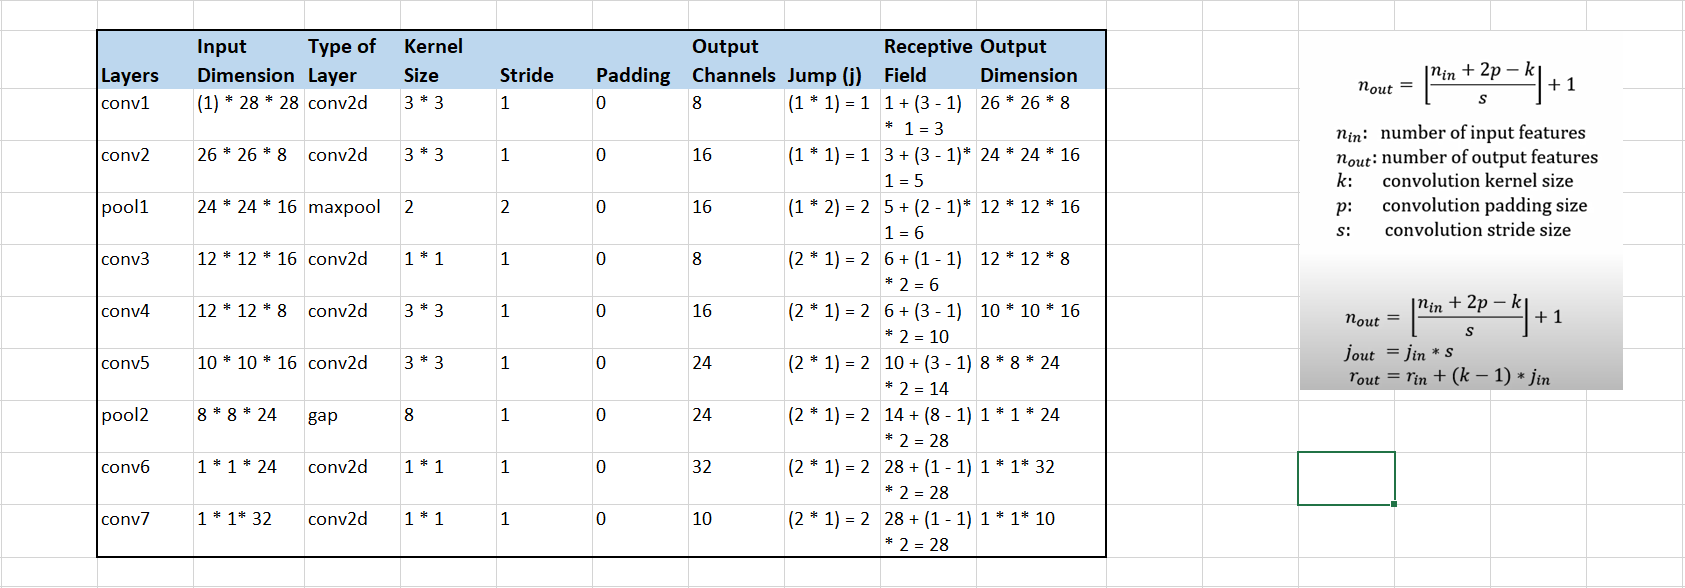

#Analysis - Train Accuracy between 2nd and 3rd Submission (with batch normalization)

Here main focus is how soon we are reaching 98% accuracy in training and whether it lasts. With batch normalization, convergence in train is lot faster.

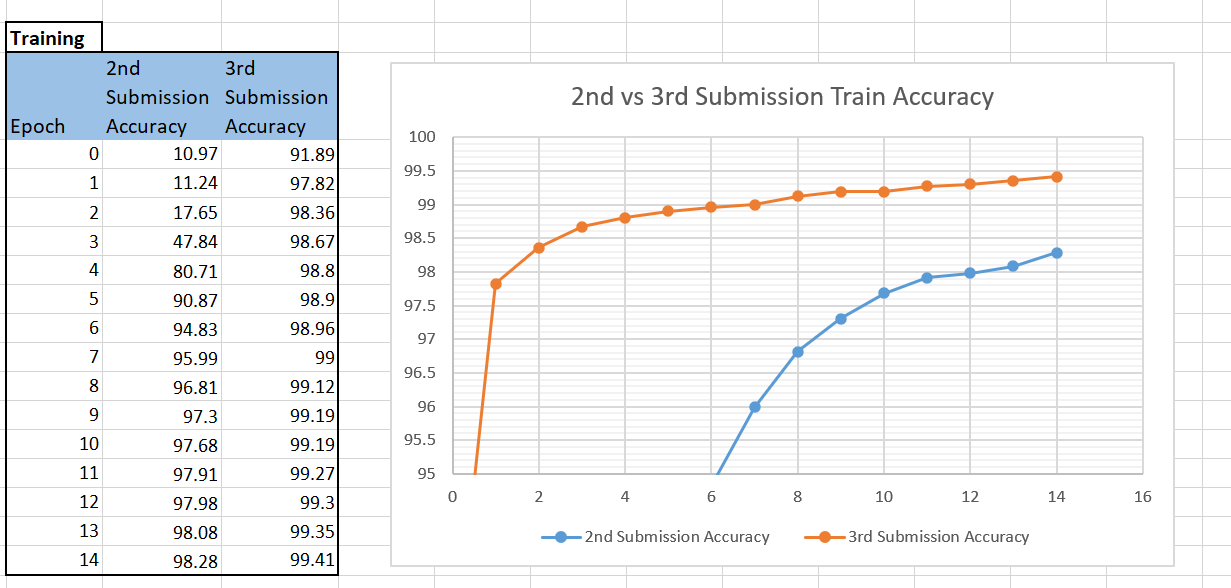

#Test Accuracy Comparison between 2nd and 3rd Submission

Comfortably we can say that test accuracy has improved while using batch normalization and we are reaching 98 % accuracy faster than earlier. Although we are yet to reach the target test accuracy.


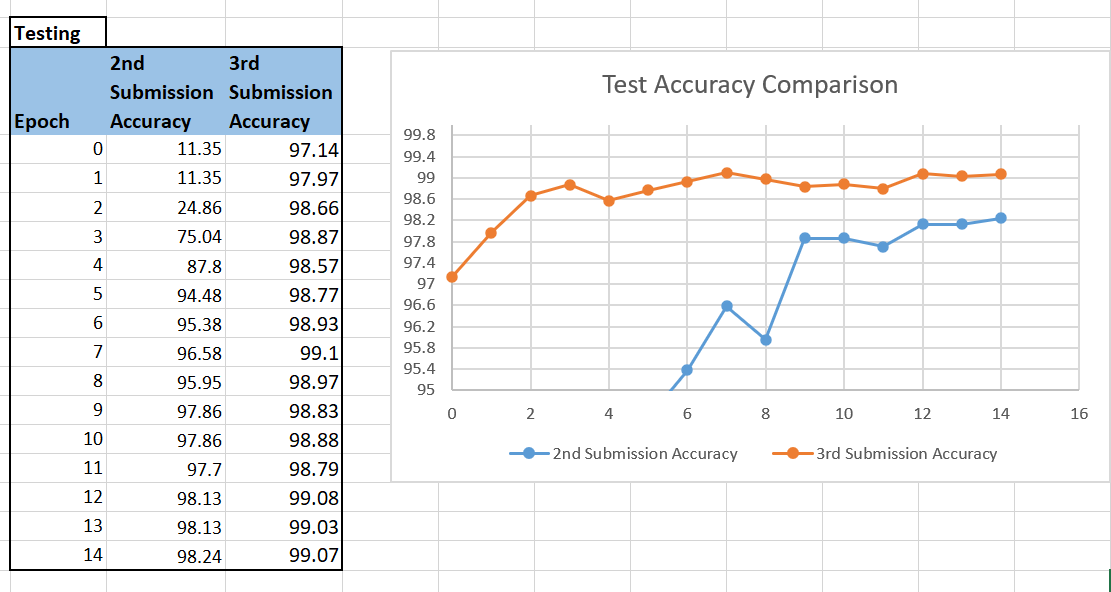

#Comments

1. Batch normalization has improved both average train and test accuracy and the model is converging faster.

2. Batch normalization increased the number of parameters by around 200. Still we are using only 7700 odd parameters, well within the specified limit.

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations

In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Dataloader Arguments & Test/Train Dataloaders


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Statistics

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


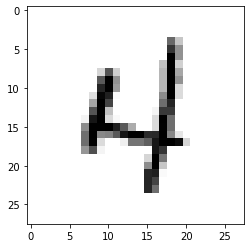

In [ ]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## MORE

It is important that we view as many images as possible.

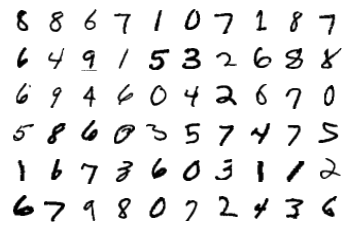

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# How did we get those mean and std values which we used above?



In [ ]:
# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


# The model


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3) # 26 * 26 * 8
        self.bn1 = nn.BatchNorm2d(8) # 26 * 26 * 8
        self.conv2 = nn.Conv2d(8, 16, 3) # 24 * 24 * 16
        self.bn2 = nn.BatchNorm2d(16) # 24 * 24 * 16
        self.pool1 = nn.MaxPool2d(2, 2) # 12 * 12 * 16
        self.conv3 = nn.Conv2d(16, 8, 1) # 12 * 12 * 8
        self.bn3 = nn.BatchNorm2d(8) # 12 * 12 * 8

        self.conv4 = nn.Conv2d(8, 16, 3) # 10 * 10 * 16
        self.bn4 = nn.BatchNorm2d(16) # 10 * 10 * 16
        self.conv5 = nn.Conv2d(16, 24, 3) # 8 * 8 * 24
        self.bn5 = nn.BatchNorm2d(24) # 8 * 8 * 24
        self.pool2 = nn.AvgPool2d(8) # 1 * 1 * 24

        self.conv6 = nn.Conv2d(24, 32, 1) # 1 * 1 * 32
        self.bn6 = nn.BatchNorm2d(32) # 1 * 1 * 32
        self.conv7 = nn.Conv2d(32, 16, 1) # 1 * 1 * 16
        self.bn7 = nn.BatchNorm2d(16) # 1 * 1 * 16
        self.conv8 = nn.Conv2d(16, 10, 1) # 1 * 1 * 10

        

    def forward(self, x):
        x = self.bn3(self.conv3(self.pool1(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x))))))))
        x = self.pool2(self.bn5(F.relu(self.conv5(self.bn4(F.relu(self.conv4(x)))))))
        x = self.conv8(self.bn7(F.relu(self.conv7(self.bn6(F.relu(self.conv6(x)))))))
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

# Model Params

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              80
       BatchNorm2d-2            [-1, 8, 26, 26]              16
            Conv2d-3           [-1, 16, 24, 24]           1,168
       BatchNorm2d-4           [-1, 16, 24, 24]              32
         MaxPool2d-5           [-1, 16, 12, 12]               0
            Conv2d-6            [-1, 8, 12, 12]             136
       BatchNorm2d-7            [-1, 8, 12, 12]              16
            Conv2d-8           [-1, 16, 10, 10]           1,168
       BatchNorm2d-9           [-1, 16, 10, 10]              32
           Conv2d-10             [-1, 24, 8, 8]           3,480
      BatchNorm2d-11             [-1, 24, 8, 8]              48
        AvgPool2d-12             [-1, 24, 1, 1]               0

# Training and Testing

In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

# Let's Train and test our model

In [ ]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.08500686287879944 Batch_id=468 Accuracy=91.89: 100%|██████████| 469/469 [00:19<00:00, 23.87it/s]



Test set: Average loss: 0.0995, Accuracy: 9714/10000 (97.14%)

EPOCH: 1


Loss=0.07431977242231369 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:14<00:00, 32.84it/s]



Test set: Average loss: 0.0708, Accuracy: 9797/10000 (97.97%)

EPOCH: 2


Loss=0.11868520826101303 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:14<00:00, 32.26it/s]



Test set: Average loss: 0.0440, Accuracy: 9866/10000 (98.66%)

EPOCH: 3


Loss=0.11161275953054428 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:14<00:00, 32.99it/s]



Test set: Average loss: 0.0359, Accuracy: 9887/10000 (98.87%)

EPOCH: 4


Loss=0.04690796509385109 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:14<00:00, 32.46it/s]



Test set: Average loss: 0.0447, Accuracy: 9857/10000 (98.57%)

EPOCH: 5


Loss=0.08476153016090393 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:14<00:00, 32.54it/s]



Test set: Average loss: 0.0385, Accuracy: 9877/10000 (98.77%)

EPOCH: 6


Loss=0.010062671266496181 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:15<00:00, 30.17it/s]



Test set: Average loss: 0.0340, Accuracy: 9893/10000 (98.93%)

EPOCH: 7


Loss=0.06732156127691269 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:14<00:00, 33.13it/s]



Test set: Average loss: 0.0278, Accuracy: 9910/10000 (99.10%)

EPOCH: 8


Loss=0.0017466951394453645 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:14<00:00, 33.07it/s]



Test set: Average loss: 0.0327, Accuracy: 9897/10000 (98.97%)

EPOCH: 9


Loss=0.0023736897855997086 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:13<00:00, 33.63it/s]



Test set: Average loss: 0.0342, Accuracy: 9883/10000 (98.83%)

EPOCH: 10


Loss=0.008427104912698269 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:14<00:00, 33.33it/s]



Test set: Average loss: 0.0336, Accuracy: 9888/10000 (98.88%)

EPOCH: 11


Loss=0.04995420202612877 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:13<00:00, 33.55it/s]



Test set: Average loss: 0.0386, Accuracy: 9879/10000 (98.79%)

EPOCH: 12


Loss=0.06207267567515373 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:14<00:00, 33.29it/s]



Test set: Average loss: 0.0286, Accuracy: 9908/10000 (99.08%)

EPOCH: 13


Loss=0.02146131545305252 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:14<00:00, 32.79it/s]



Test set: Average loss: 0.0295, Accuracy: 9903/10000 (99.03%)

EPOCH: 14


Loss=0.07630743086338043 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:13<00:00, 33.54it/s]



Test set: Average loss: 0.0295, Accuracy: 9907/10000 (99.07%)

